# Modelproject - Solow model

Imports and set magics:

In [39]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from ipywidgets import interact
import scipy.optimize as so

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as mp
Romer = mp.Romer()
Solow = mp.Solow()
SemiEndogenousRD = mp.SemiEndogenousRomer()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Solow model

$$
Y_t=K_t^\alpha (A_tL_t)^{1-\alpha},  0<\alpha<1
$$
$$
S_t=sY_t,    0<s<1,     0<\delta<1
$$
$$
K_{t+1}=S_t+(1-\delta)K_t
$$
$$
L_{t+1}=(1+n)L_t,    n≥0 
$$
$$
A_{t+1}=(1+g)A_t,    g≥0 
$$

# Semiendogenous romer model with R&D

$$
Y_t = K_t^\alpha (A_t L_{Y_t})^{1-\alpha}, 1>\alpha>0
$$
$$
A_{t+1}-A_t=\rho A_t^\phi L_{A_t}^\lambda, A_0 > 0, 1 ≥ \lambda > 0
$$
$$
K_{t+1} = sY_t + (1-\delta)K_t, 0<s<1, 0<\delta<1, K_0 > 0
$$
$$
L_{t+1}=(1+n)L_t,  n≥0
$$
$$
L_t=L_{Y_t}+L_{A_t}
$$
$$
L_{A_t} = s_R L_t
$$


In [40]:
Y_per_L_ss, Y_ss, L_ss, K_ss, A_ss, LA_ss = Romer.steady_state_values()
print(f"Steady state value of Y/L: {Y_per_L_ss}")
print(f"Steady state value of Y: {Y_ss}")
print(f"Steady state value of L: {L_ss}")
print(f"Steady state value of K: {K_ss}")
print(f"Steady state value of A: {A_ss}")
print(f"Steady state value of LA: {LA_ss}")

Steady state value of Y/L: 1.0335799556643352
Steady state value of Y: 1.9571301178704708
Steady state value of L: 1.8935449619981475
Steady state value of K: 2.3972817211679827
Steady state value of A: 0.9629661979212158
Steady state value of LA: 0.3787089923996295


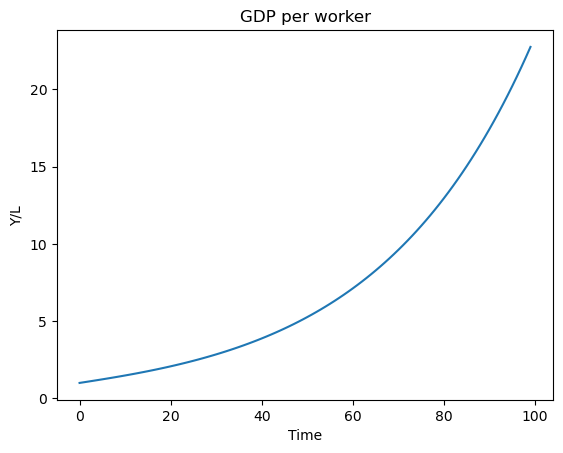

In [41]:
alpha = Romer.par.alpha
rho = Romer.par.rho
phi = Romer.par.phi
lambda_ = Romer.par.lambda_
s = Romer.par.s
delta = Romer.par.delta
n = Romer.par.n
s_R = Romer.par.s_R

T = 100 # Number of periods to simulate

# Initializing arrays to store the values of the endogenous variables
Y = np.zeros(T)
L = np.zeros(T)
K = np.zeros(T)
A = np.zeros(T)
LA = np.zeros(T)
Y_per_L = np.zeros(T)

# Setting the initial values of the endogenous variables
Y[0] = 1
L[0] = 1
K[0] = 1
A[0] = 1
LA[0] = s_R*L[0]
Y_per_L[0] = Y[0]/L[0]

# Simulating the model
for t in range(1, T):
    A[t] = A[t-1] + rho*A[t-1]**phi*LA[t-1]**lambda_ # Updating A
    K[t] = s*Y[t-1] + (1-delta)*K[t-1] # Updating K
    L[t] = (1+n)*L[t-1] # Updating L
    LA[t] = s_R*L[t] # Updating LA
    Y[t] = A[t]*K[t]**alpha*L[t]**(1-alpha) # Updating Y
    Y_per_L[t] = Y[t]/L[t] # Updating Y/L

plt.plot(Y_per_L)
plt.title('GDP per worker')
plt.xlabel('Time')
plt.ylabel('Y/L')
plt.show()


# Solow-model with land as fixed resource

$$
Y_t=K_t^\alpha(A_tL_t)^\beta X^\kappa, \alpha>0, \beta>0, \kappa>0, \alpha+\beta+\kappa=1
$$
$$
K_{t+1}=sY_t+(1-\delta)K_t, 0<s<1, 0<\delta<1
$$
$$
L_{t+1}=(1+n)L_t, n≥0
$$
$$
A_{t+1}=(1+g)A_t, g≥0
$$

In [42]:
Y_per_L_sss, Y_sss, K_sss, A_sss = Solow.steady_state_values()
print(f"Steady state value of Y/L: {Y_per_L_sss}")
print(f"Steady state value of Y: {Y_sss}")
print(f"Steady state value of K: {K_sss}")
print(f"Steady state value of A: {A_sss}")

Steady state value of Y/L: 1.9999999999999998
Steady state value of Y: 1.9999999999999998
Steady state value of K: 4.0
Steady state value of A: 4.0


/Users/christopher/projects-2023-2x-chris-og-ras/modelproject/modelproject.py:61: RuntimeWarning: invalid value encountered in double_scalars
  eq1 = K**par.alpha*(A*par.L)**par.beta*par.X**par.kappa - par.s*K - par.delta*K


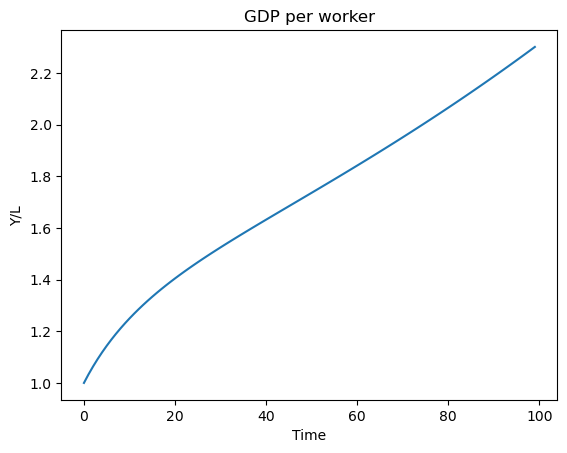

In [43]:
T = 100 # Number of periods to simulate

# Initializing arrays to store the values of the endogenous variables
Y = np.zeros(T)
K = np.zeros(T)
A = np.zeros(T)
Y_per_L_mland = np.zeros(T)

# Setting the initial values of the endogenous variables
Y[0] = 1
K[0] = 1
A[0] = 1
Y_per_L_mland[0] = Y[0]/Solow.par.L

# Simulating the model
for t in range(1, T):
    A[t] = (1+Solow.par.g)*A[t-1] # Updating A
    K[t] = Solow.par.s*Y[t-1] + (1-Solow.par.delta)*K[t-1] # Updating K
    Y[t] = K[t]**Solow.par.alpha*(A[t]*Solow.par.L)**Solow.par.beta*Solow.par.X**Solow.par.kappa # Updating Y
    Y_per_L_mland[t] = Y[t]/Solow.par.L # Updating Y/L

plt.plot(Y_per_L_mland)
plt.title('GDP per worker')
plt.xlabel('Time')
plt.ylabel('Y/L')
plt.show()

# Semi-endogenous R&D model with land as fixed resource

$$
Y_t=K_t^\alpha(A_tL_t)^\beta X^\kappa, \alpha>0, \beta>0, \kappa>0, \alpha+\beta+\kappa=1
$$
$$
K_{t+1}=sY_t+(1-\delta)K_t, 0<s<1, 0<\delta<1
$$
$$
L_{t+1}=(1+n)L_t, n≥0
$$
$$
A_{t+1} - A_t= \rho A_t^\phi L_{A_t}^\lambda, 1>\phi, 1≥\lambda>0
$$
$$
L_t = L_{A_t} + L_{Y_t}
$$
$$
s_R L_t = L_{A_t}
$$

In [44]:
Y_per_L_ss, Y_ss, L_ss, K_ss, A_ss, LA_ss = SemiEndogenousRD.steady_state_values()

print(f"Steady state value of Y/L: {Y_per_L_ss}")
print(f"Steady state value of Y: {Y_ss}")
print(f"Steady state value of L: {L_ss}")
print(f"Steady state value of K: {K_ss}")
print(f"Steady state value of A: {A_ss}")
print(f"Steady state value of LA: {LA_ss}")

Steady state value of Y/L: 1.7031335730143335
Steady state value of Y: 2.128916966267917
Steady state value of L: 1.25
Steady state value of K: 8.051978175912426
Steady state value of A: 0.9808616863905326
Steady state value of LA: 0.25


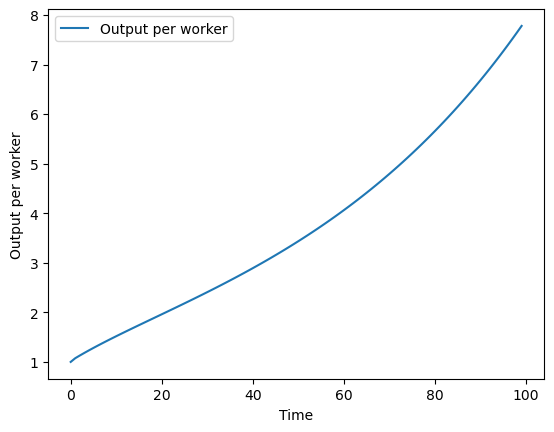

In [45]:
T = 100 # Number of periods to simulate

# Initializing arrays to store the values of the endogenous variables
Y = np.zeros(T)
L = np.zeros(T)
K = np.zeros(T)
A = np.zeros(T)
LA = np.zeros(T)
Y_per_L_se = np.zeros(T)

# Setting the initial values of the endogenous variables
Y[0] = 1
L[0] = 1
K[0] = 1
A[0] = 1
LA[0] = 1
Y_per_L_se[0] = Y[0]/L[0]

# Simulating the model
for t in range(1, T):
    A[t] = A[t-1] + SemiEndogenousRD.par.rho*A[t-1]**SemiEndogenousRD.par.phi*LA[t-1]**SemiEndogenousRD.par.lambda_ # Updating A
    K[t] = SemiEndogenousRD.par.s*Y[t-1] + (1-SemiEndogenousRD.par.delta)*K[t-1] # Updating K
    L[t] = (1+SemiEndogenousRD.par.n)*L[t-1] # Updating L
    LA[t] = SemiEndogenousRD.par.s_R*L[t]
    Y[t] = A[t]*(K[t]**SemiEndogenousRD.par.alpha)*(L[t]**(1-SemiEndogenousRD.par.alpha)) # Updating Y
    Y_per_L_se[t] = Y[t]/L[t] # Updating output per worker

#Plotting the results
fig, ax = plt.subplots()
ax.plot(range(T), Y_per_L_se, label='Output per worker')
ax.set_xlabel('Time')
ax.set_ylabel('Output per worker')
ax.legend()

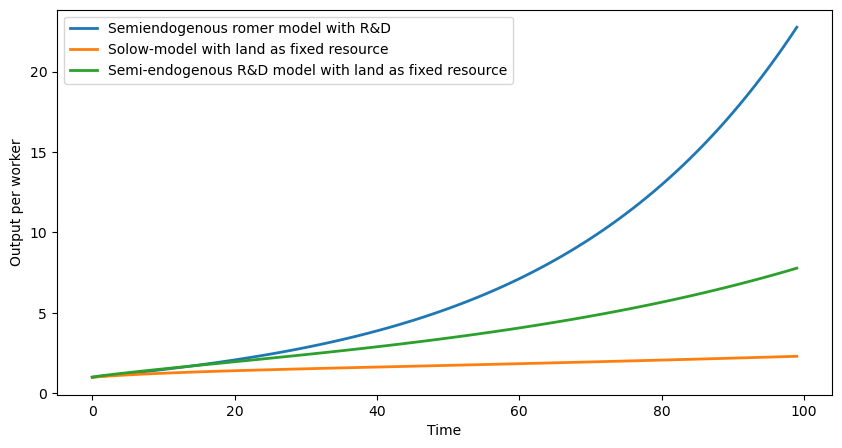

In [46]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(range(T), Y_per_L, label='Semiendogenous romer model with R&D', linewidth=2)
ax.plot(Y_per_L_mland, label='Solow-model with land as fixed resource', linewidth=2)
ax.plot(Y_per_L_se, label='Semi-endogenous R&D model with land as fixed resource', linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Output per worker')
ax.legend()

plt.show()

interactive(children=(IntSlider(value=100, description='T', min=1), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(T)>

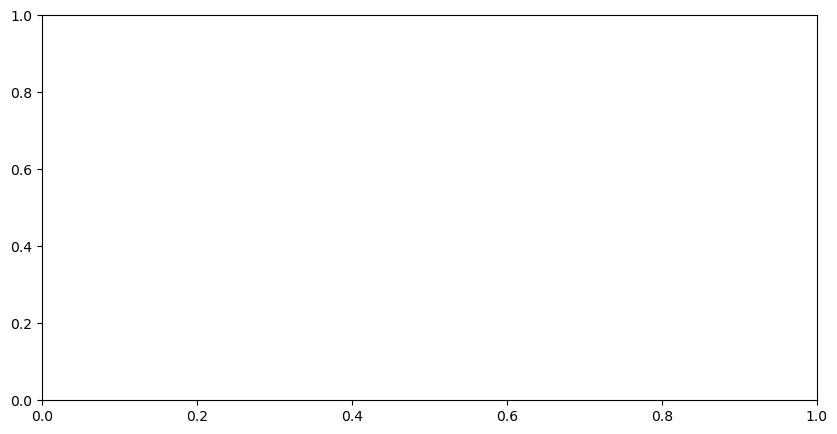

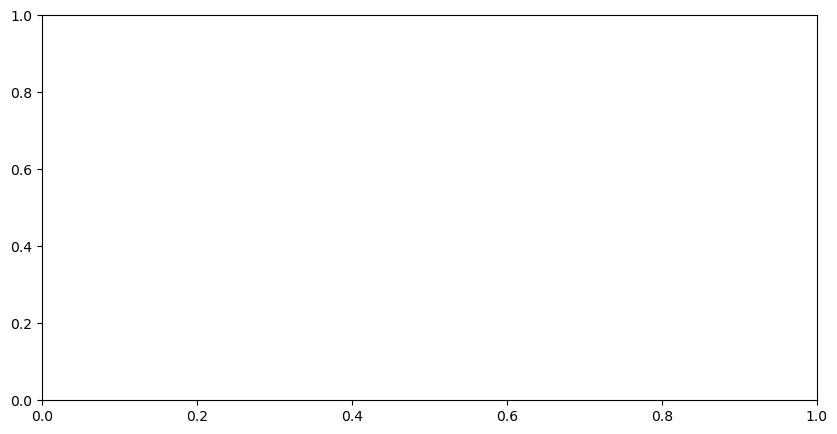

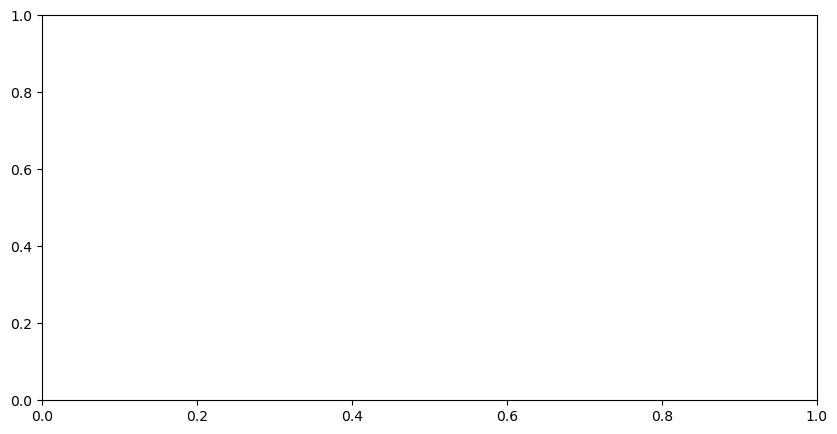

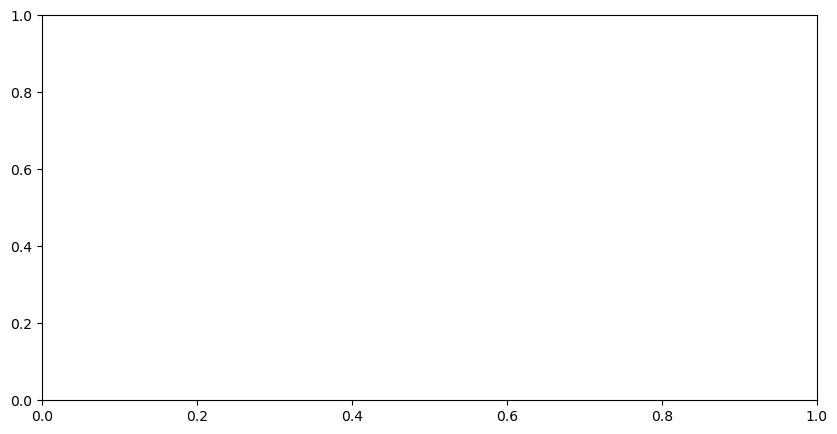

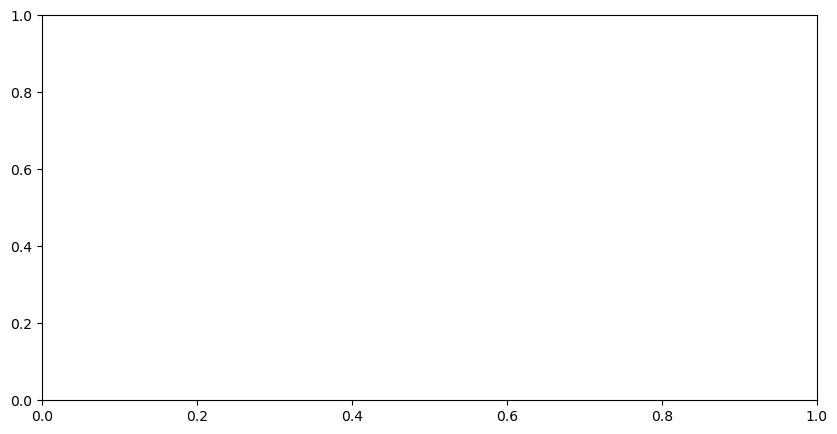

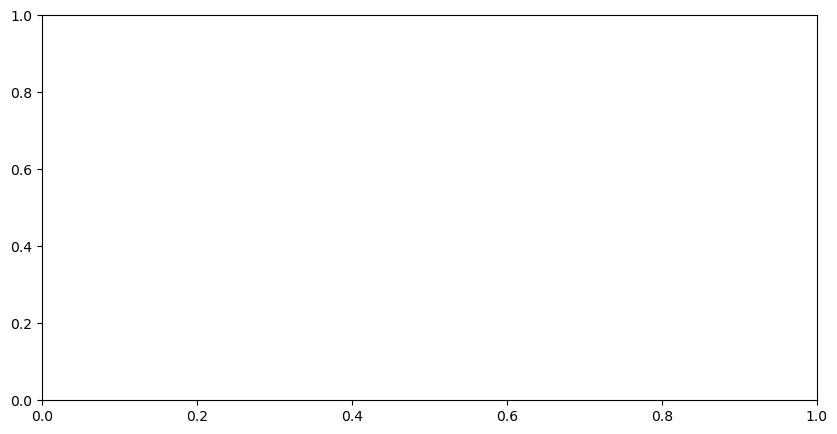

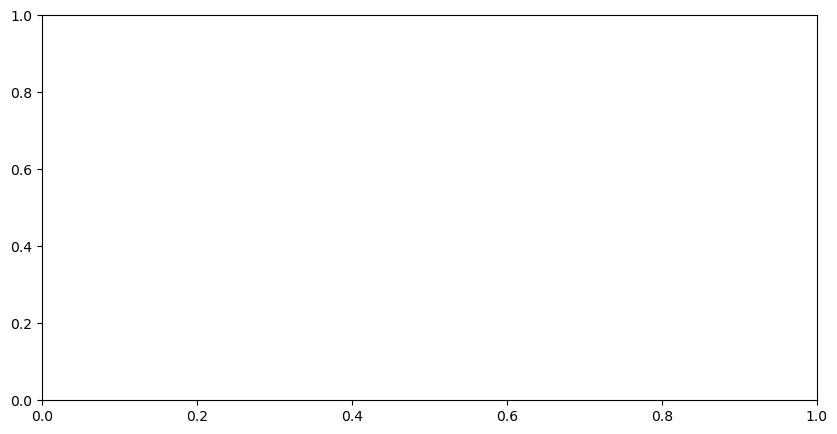

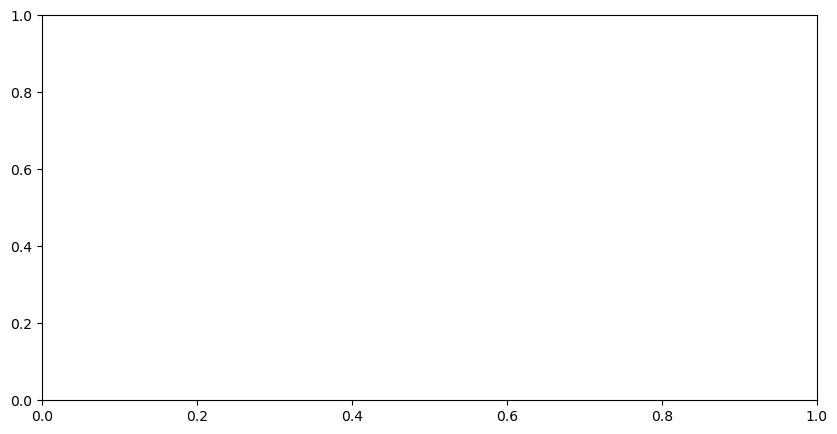

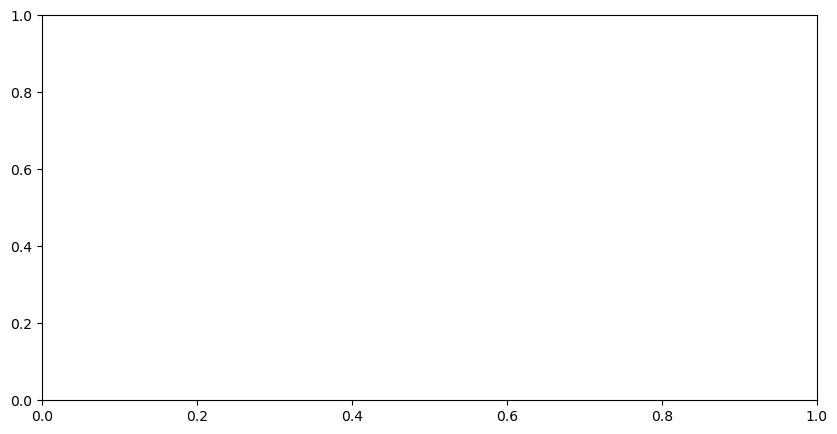

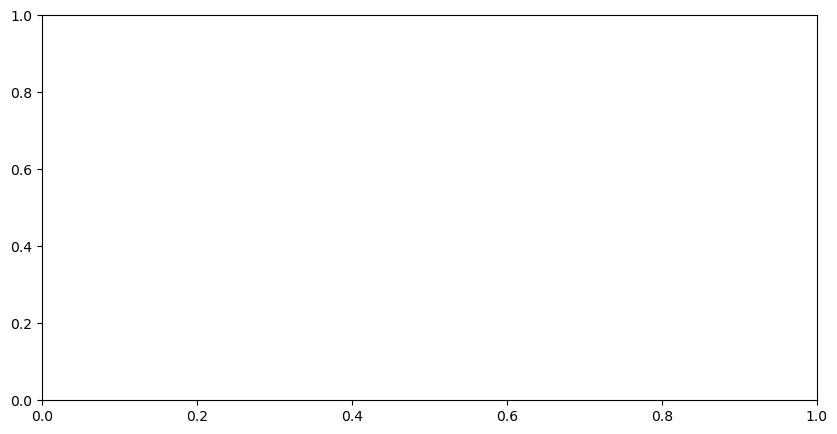

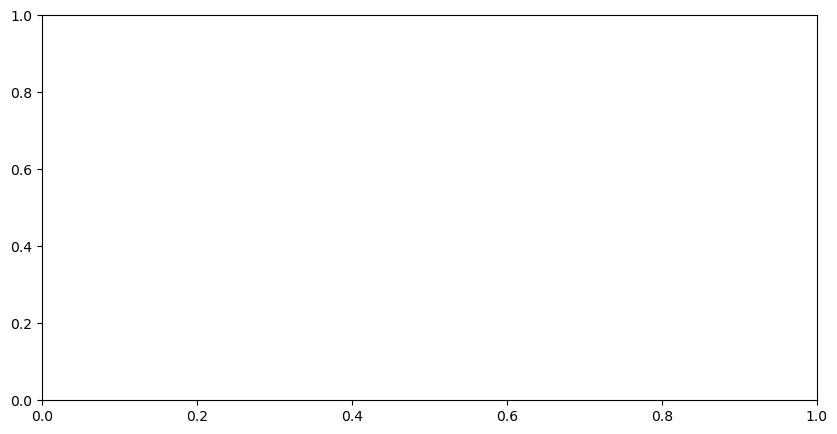

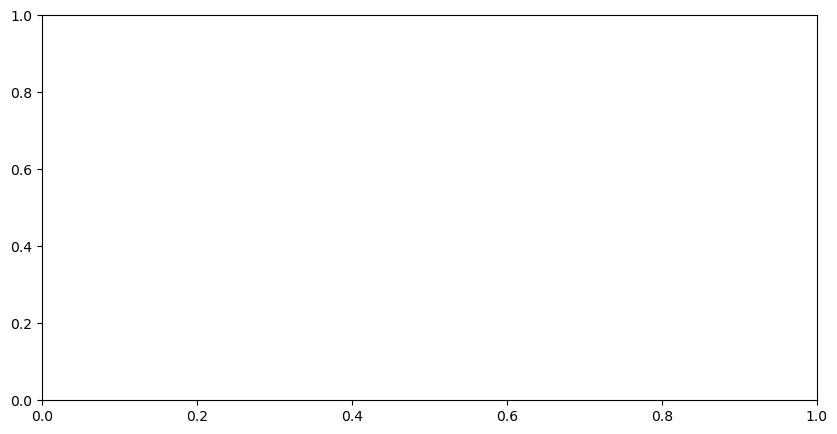

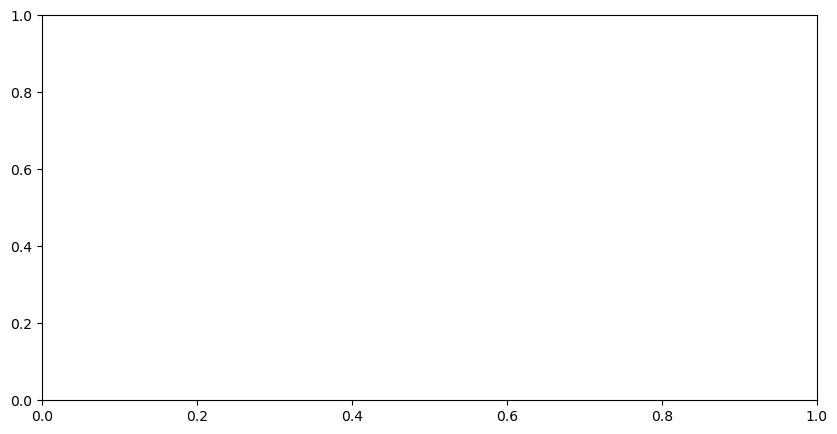

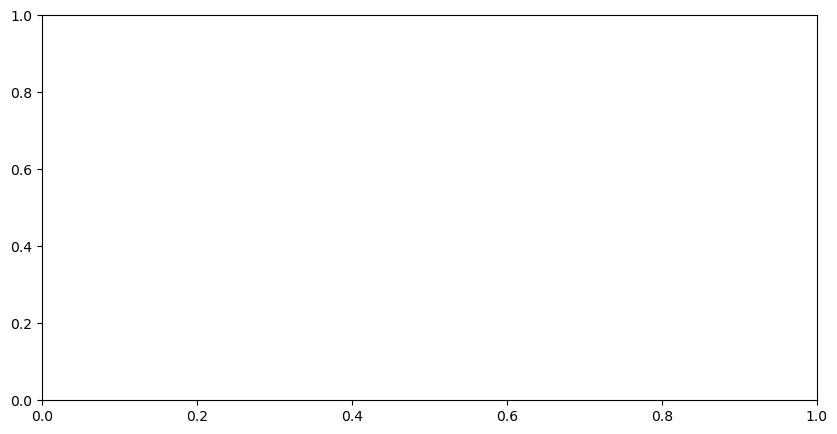

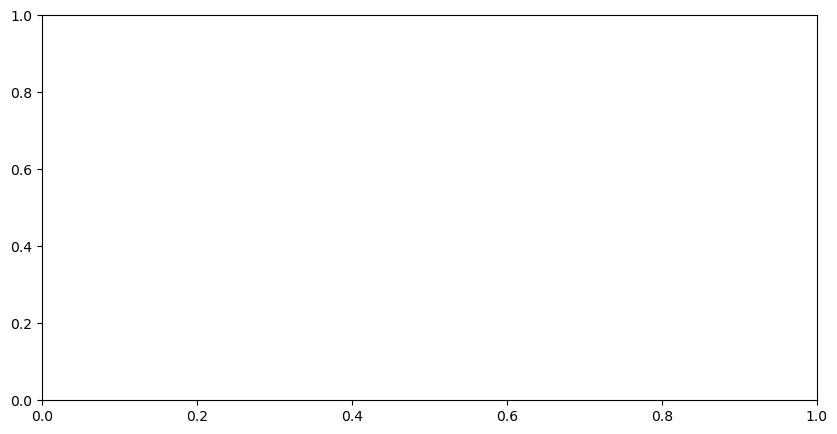

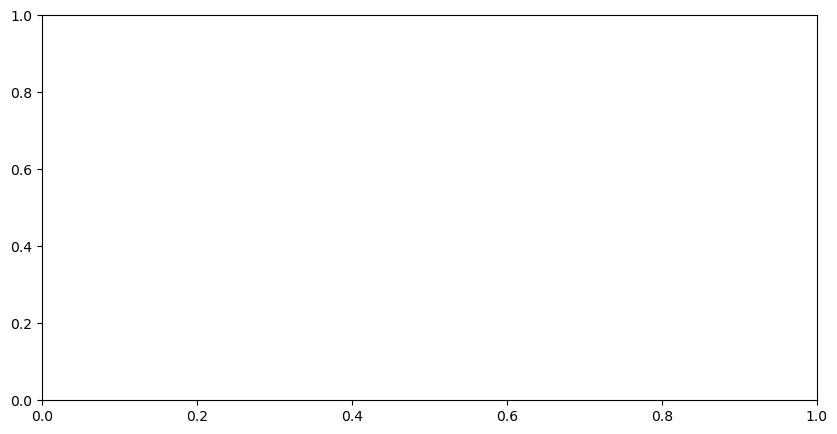

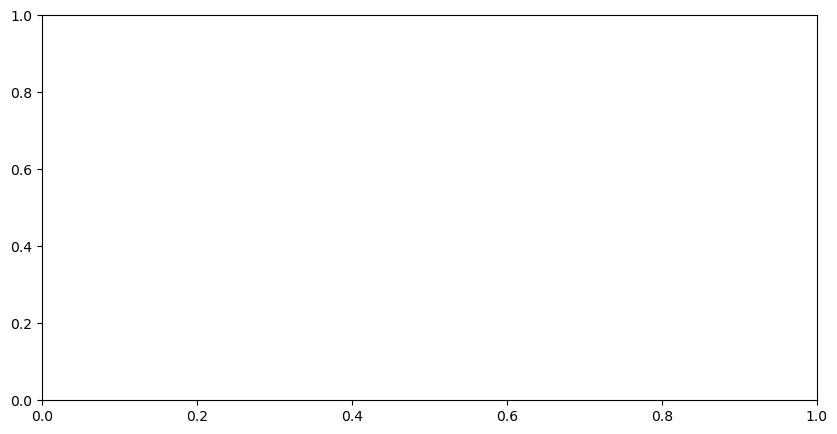

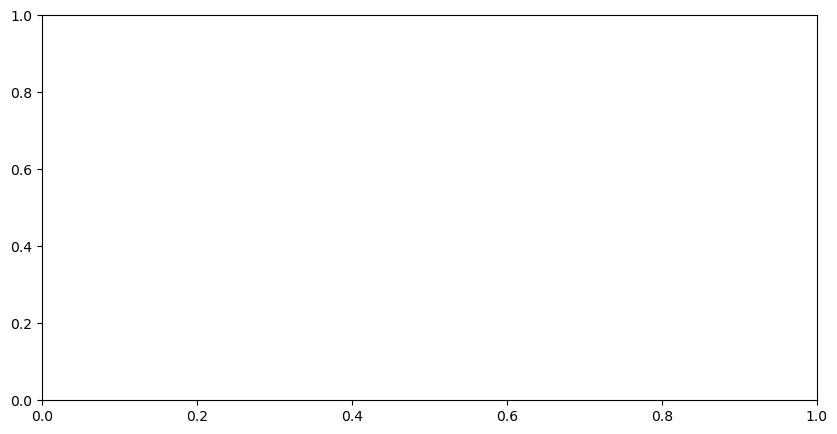

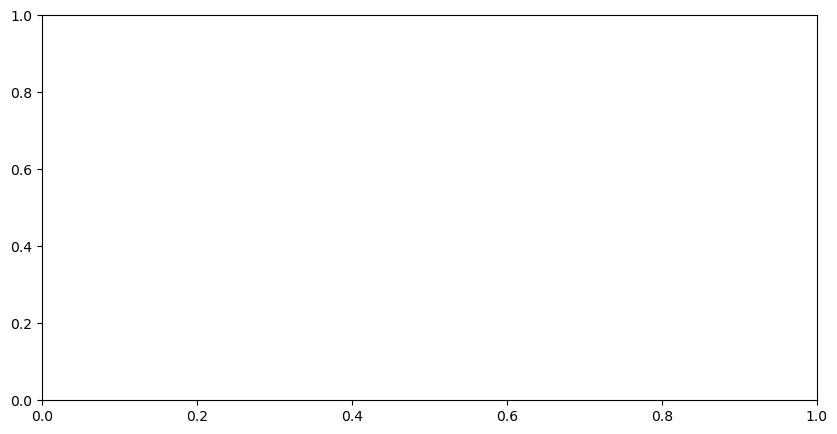

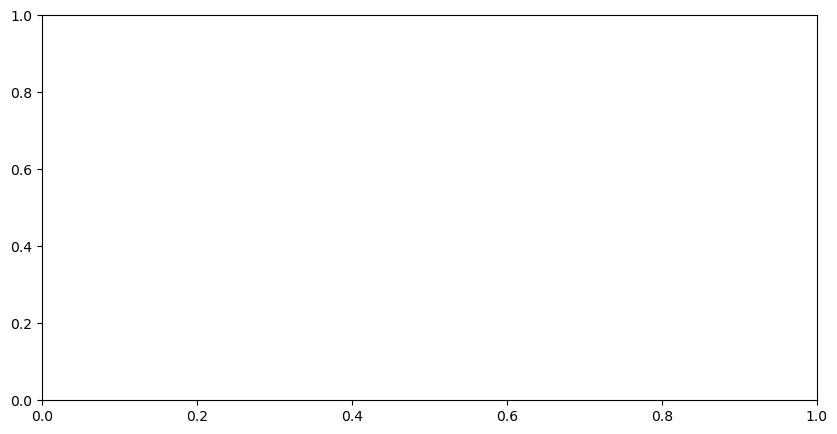

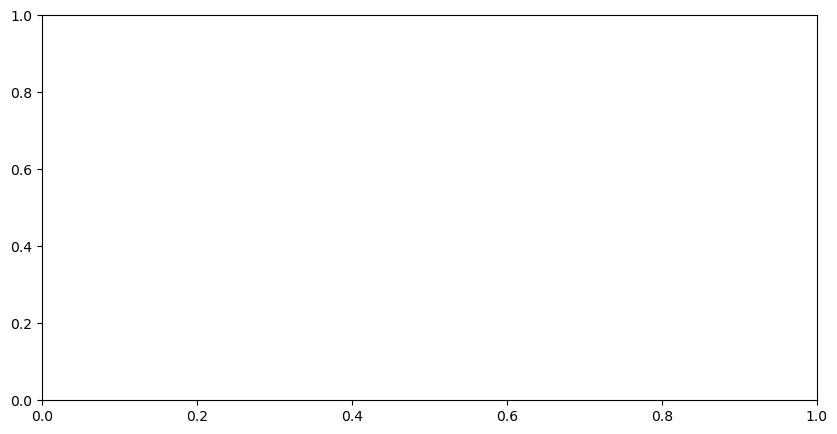

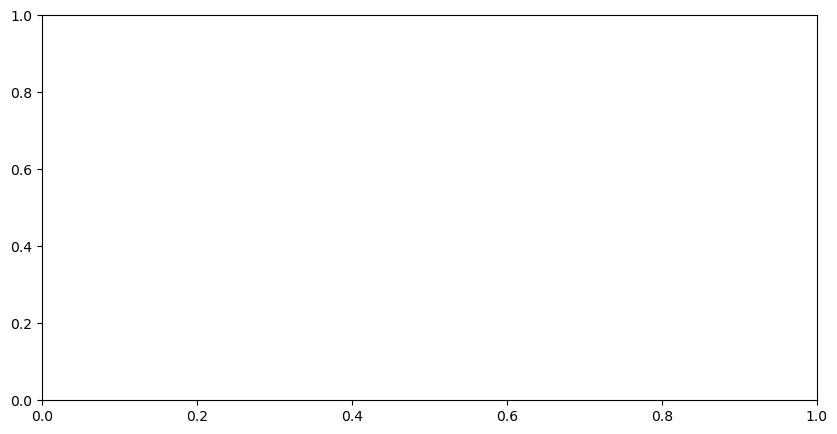

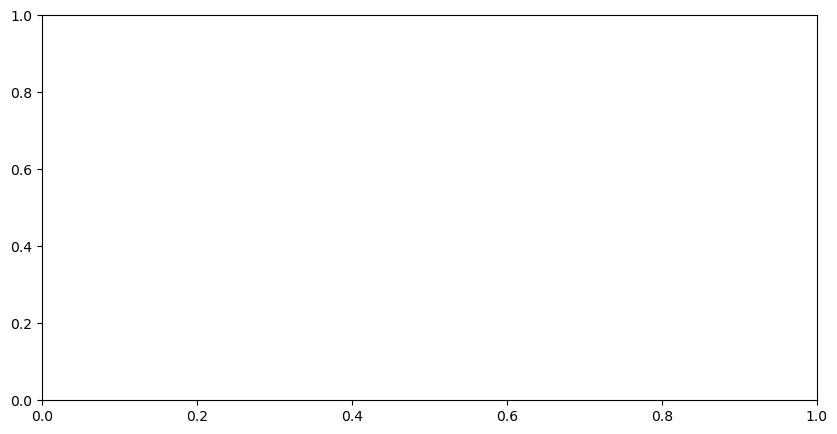

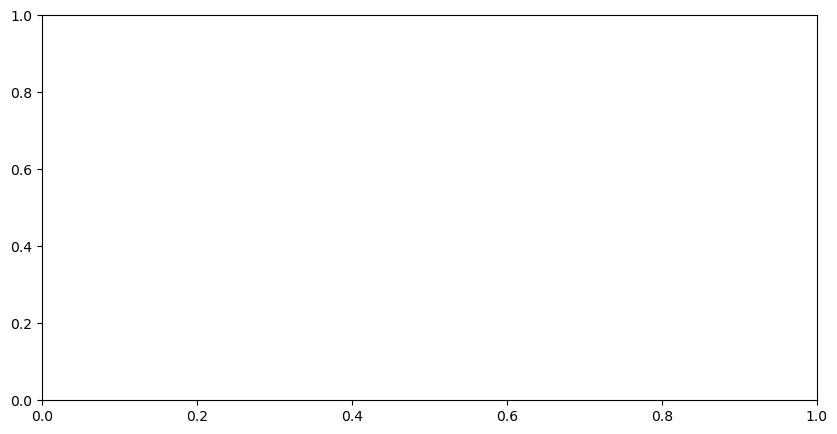

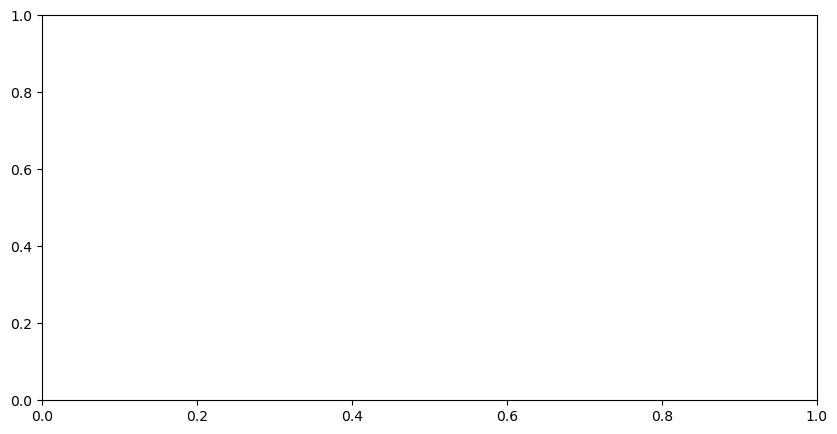

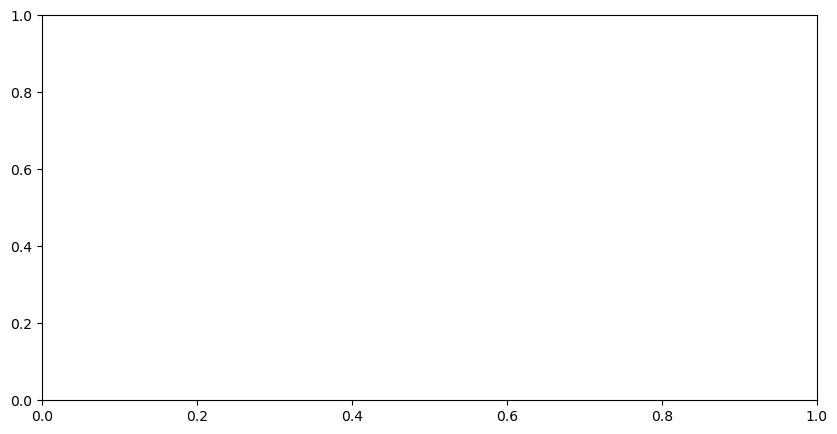

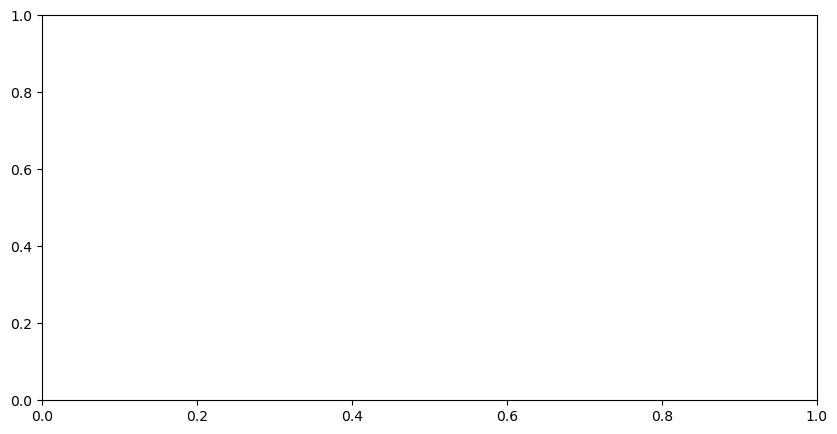

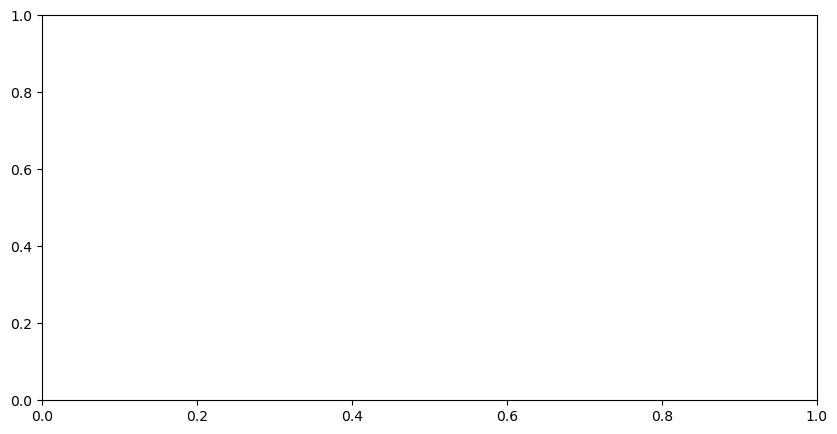

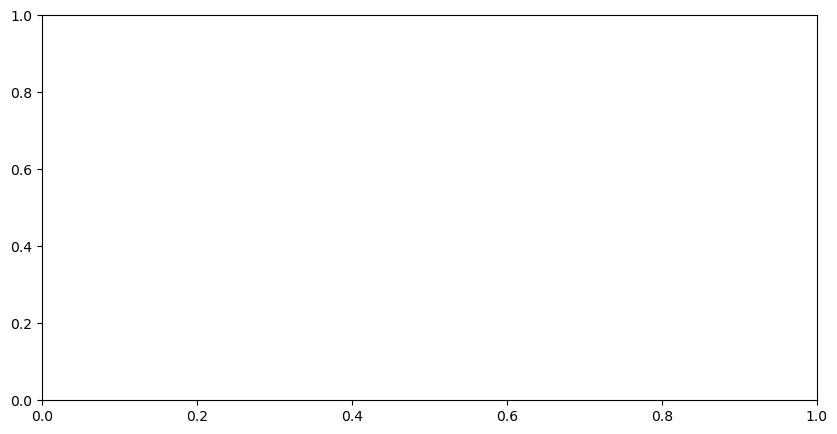

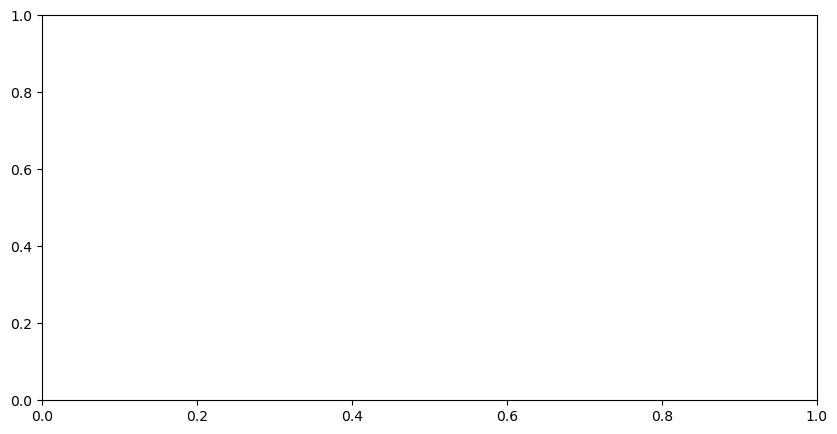

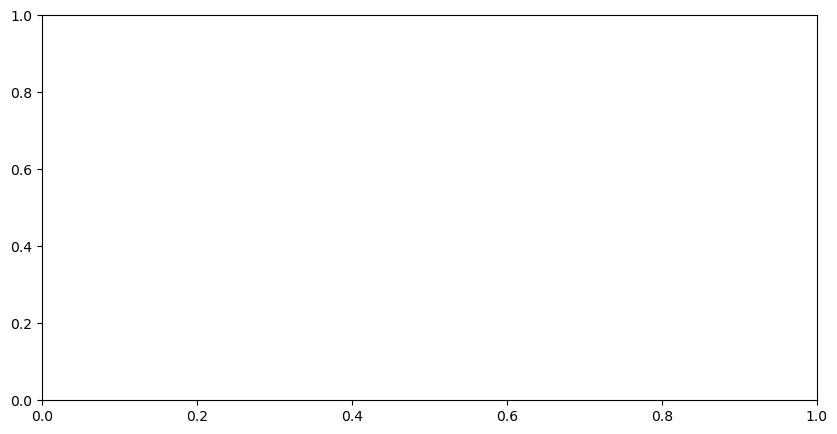

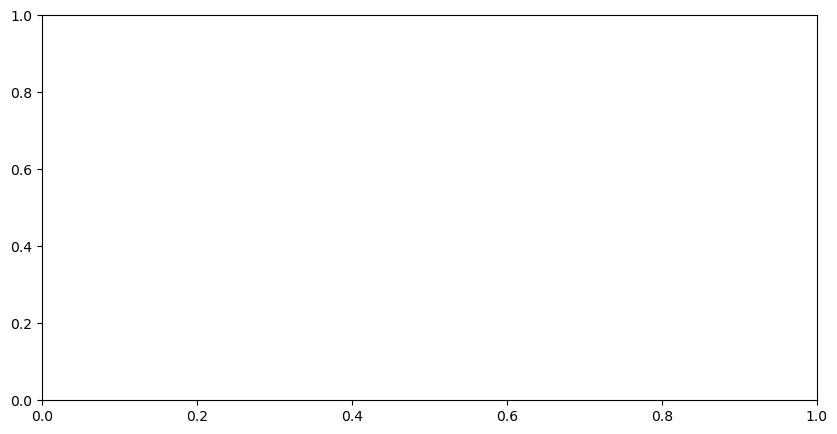

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider

def plot(T, alpha, rho, phi, lambda_, s, delta, n, s_R, beta, g, L, X):
    fig, ax = plt.subplots(figsize=(10,5))

    ax.plot(range(T), Y_per_L, label='Semiendogenous romer model with R&D', linewidth=2)
    ax.plot(Y_per_L_mland, label='Solow-model with land as fixed resource', linewidth=2)
    ax.plot(Y_per_L_se, label='Semi-endogenous R&D model with land as fixed resource', linewidth=2)

    ax.set_xlabel('Time')
    ax.set_ylabel('Output per worker')
    ax.legend()

    plt.show()

interact(plot, T=IntSlider(min=1, max=100, step=1, value=100))

## Analytical solution

## Numerical solution

# Conclusion